In [1]:
"""
    Importing the most important libraries.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
"""
    Declaring some global variables.
    DATA_DIR -> the path where the data directory is located.
    DATA_FILE -> the file where the data is contained
"""
DATA_DIR = 'F:/Python/Time Series - AirPassengers/data/'
DATA_FILE = 'AirPassengers.csv'

In [94]:
data = pd.read_csv(DATA_DIR+DATA_FILE)
display(data.head(10))
display(data.dtypes)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


Month          object
#Passengers     int64
dtype: object

In [4]:
"""
    After we read the data in the last step, we must transform the Month column in a date type.
    After we redo the reading operation we gonna do some basic operations on data.
"""
data = pd.read_csv(DATA_DIR+DATA_FILE, parse_dates = [0])
display(data.head(5))
display('Number of columns and rows:',data.shape)
display('Columns types:',data.dtypes)
display('Verifying for NULL values:',data.isnull().any())
display('Descriptive statistics:',data.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


'Number of columns and rows:'

(144, 2)

'Columns types:'

Month          datetime64[ns]
#Passengers             int64
dtype: object

'Verifying for NULL values:'

Month          False
#Passengers    False
dtype: bool

'Descriptive statistics:'

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
85%,410.300000
95%,488.150000
99%,585.790000


In [5]:
"""
    Renaming the columns in a favourable way.
"""
data.rename(columns = {'Month':'date','#Passengers':'value'}, inplace=True)
display(data.head(5))

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


'First date: 1949-01-01 00:00:00 - Last date: 1960-12-01 00:00:00'

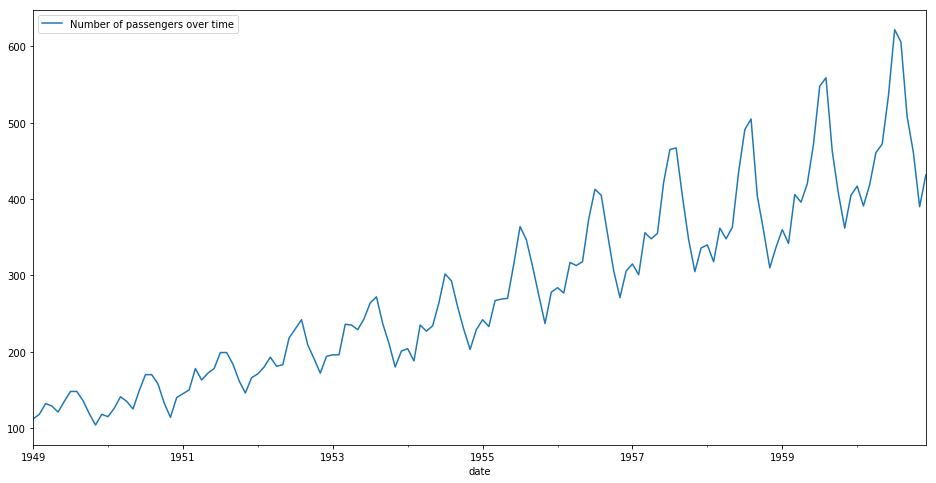

In [6]:
"""
    We can see that the we analyze passengers between 1949-01-01 and 1960-12-01, also
    from the graph we can see an ascending trend and some seasonality and an exponentially
    grow.
"""
display(f"First date: {min(data['date'])} - Last date: {max(data['date'])}")
fig,ax = plt.subplots(figsize=(16,8))
data.plot(x="date",y="value",ax=ax, label = "Number of passengers over time")

In [7]:
"""
    For some simplicity in maneuvering the data  we're gonna set the date as index
    and we can perform some usefull operations.
"""
data.set_index('date',inplace=True)
display('All values from 1949',data['1949'])
display('Values between 1949-05-01 - 1950-03-01',data['1949-05-01':'1950-03-01'])

'All values from 1949'

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


'Values between 1949-05-01 - 1950-03-01'

,value
date,
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136
1949-10-01,119
1949-11-01,104
1949-12-01,118
1950-01-01,115


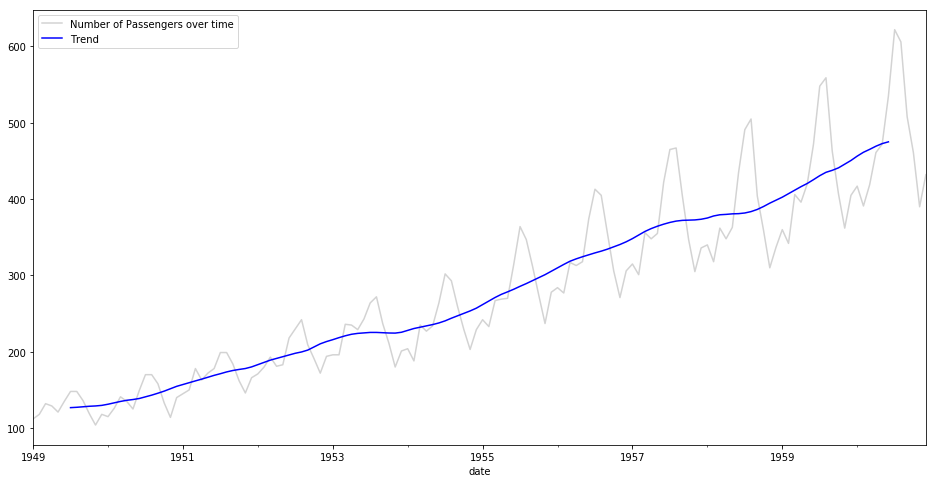

In [8]:
"""
    Looking at decomposition trend,seasonality and residual plots.
"""
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,
                                  freq=12,
                                  model='multiplicative')
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
fig,ax = plt.subplots(figsize=(16,8))
data.plot(y='value',ax=ax,label='Number of Passengers over time',color = 'lightgrey')
trend.plot(y='value',ax=ax,label='Trend',color='blue')
plt.legend(loc = 'upper left')

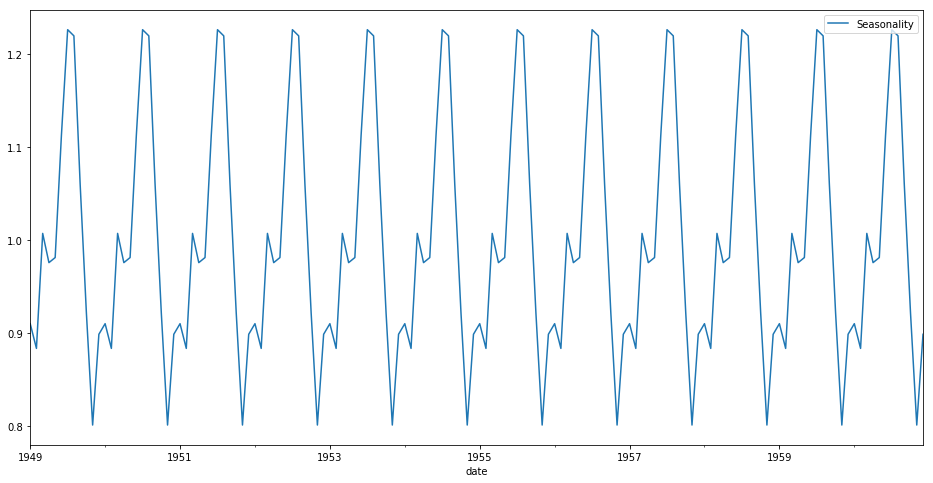

In [9]:
fig,ax = plt.subplots(figsize=(16,8))
seasonality.plot(y='value',ax=ax,label='Seasonality')

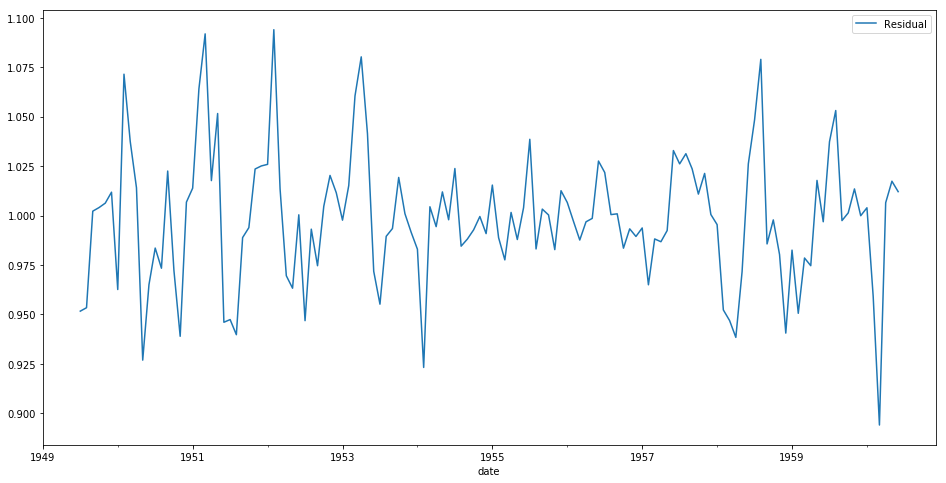

In [10]:
fig,ax = plt.subplots(figsize=(16,8))
residual.plot(y='value',ax=ax,label='Residual')

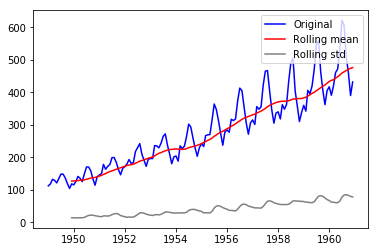

'Is our Time Series Stationary using Augmented Dickey-Fuller test? :'

False

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


'Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: '

False

In [11]:
"""
    Checking if our Time Series is Stationary, using:
    1)Rolling statistics
    2)Augmented Dickey-Fuller test
    3)Kwiatkowski-Phillips-Schmidt-Shin test
"""
#1) Rolling statistics
def visual_checking(data):
    
    #Determinng rolling statistics
    rolmean = data.rolling(12).mean()
    rolstd = data.rolling(12).std()
    
    #Plotting rolling statistics
    original = plt.plot(data,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling mean')
    resid = plt.plot(rolstd,color='grey',label='Rolling std')
    plt.legend(loc = 'upper right')
    plt.show()
    
visual_checking(data)

"""
    We can see that the mean and the std are not constant so we can already decide that this Time Series is not
    stationary
"""
#2) Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def is_stationary_ADF(data,significance_level=0.05):
    test = adfuller(data.iloc[:,0],autolag='AIC')
    p_value = test[0]
    return p_value < significance_level

display('Is our Time Series Stationary using Augmented Dickey-Fuller test? :',is_stationary_ADF(data,0.05))

#3)Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
def is_stationary_KPSS(data,significance_level=0.05):
    test = kpss(data.iloc[:,0])
    p_value = test[1]
    return p_value > significance_level

display('Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: ',is_stationary_KPSS(data,0.05))

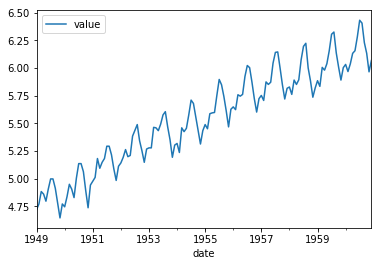

In [12]:
"""
    The conclusion on what you did in the last step is that our Time Series is not stationary and we have to
    make it stationary.
"""

#Transforming the trend using log
data_log = np.log(data)
data_log.plot(y='value')

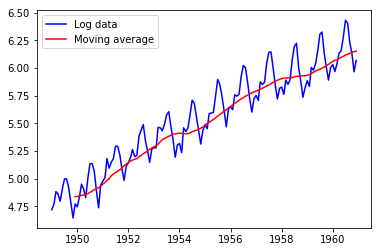

In [13]:
#Moving average
moving_average = data_log.rolling(12).mean()
plt.plot(data_log,color='blue',label='Log data')
plt.plot(moving_average,color='red',label='Moving average')
plt.legend(loc = 'upper left')

In [14]:
"""
    The rolling function take the consecutive "k" values to make the mean value, so as is shown in the graph
    the first 11 elements don't appear because they are NULL, so we have to take care of them.
"""
display(moving_average.head(11))
data_log_moving_average_dif = data_log- moving_average
data_log_moving_average_dif.dropna(inplace=True)

,value
date,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


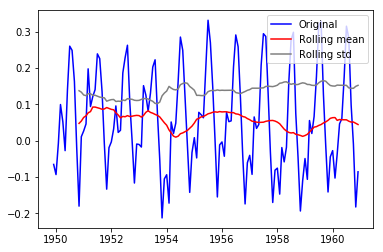

'Is our Time Series Stationary using Augmented Dickey-Fuller test? :'

True

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


'Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: '

True

In [15]:
visual_checking(data_log_moving_average_dif)
display('Is our Time Series Stationary using Augmented Dickey-Fuller test? :',is_stationary_ADF(data_log_moving_average_dif,0.05))
display('Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: ',is_stationary_KPSS(data_log_moving_average_dif,0.05))

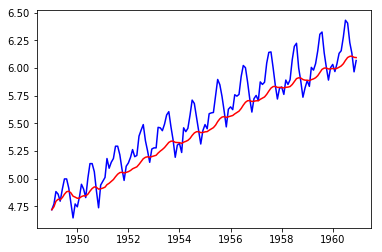

In [16]:
#Exponentially weighted moving average

expwe_moving_average = data_log.ewm(12).mean()
plt.plot(data_log,color='blue')
plt.plot(expwe_moving_average,color='red')

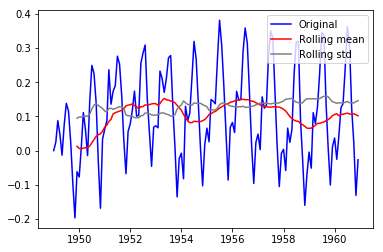

'Is our Time Series Stationary using Augmented Dickey-Fuller test? :'

True

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


'Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: '

True

In [17]:
data_log_ewma_dif = data_log-expwe_moving_average
visual_checking(data_log_ewma_dif)
display('Is our Time Series Stationary using Augmented Dickey-Fuller test? :',is_stationary_ADF(data_log_ewma_dif,0.05))
display('Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: ',is_stationary_KPSS(data_log_ewma_dif,0.05))

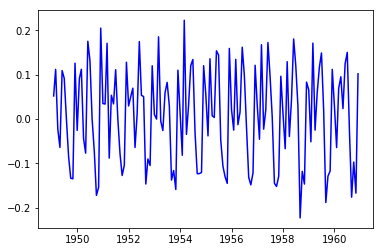

In [18]:
#First order differencing
data_log_firstdif = data_log - data_log.shift()
plt.plot(data_log_firstdif,color='blue')

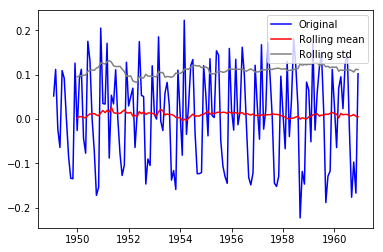

'Is our Time Series Stationary using Augmented Dickey-Fuller test? :'

True

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


'Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: '

True

In [19]:
data_log_firstdif.dropna(inplace=True)
visual_checking(data_log_firstdif)
display('Is our Time Series Stationary using Augmented Dickey-Fuller test? :',is_stationary_ADF(data_log_firstdif,0.05))
display('Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: ',is_stationary_KPSS(data_log_firstdif,0.05))

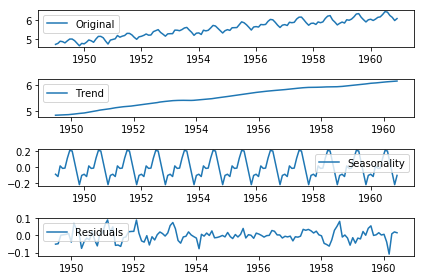

In [20]:
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

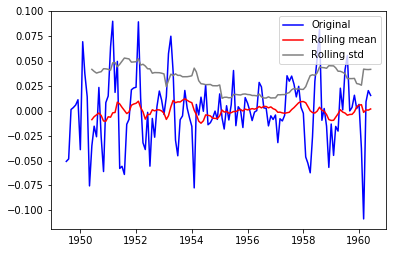

'Is our Time Series Stationary using Augmented Dickey-Fuller test? :'

True

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


'Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: '

True

In [22]:
data_log_residual = residual
data_log_residual.dropna(inplace=True)
visual_checking(data_log_residual)
display('Is our Time Series Stationary using Augmented Dickey-Fuller test? :',is_stationary_ADF(data_log_residual,0.05))
display('Is our Time Series Staionary using Kwiatkowski-Phillips-Schmidt-Shin test: ',is_stationary_KPSS(data_log_residual,0.05))

In [26]:
"""
    Saving the data_log_firstdif into a csv file to make a prediction on it later.
"""
data_log_firstdif.to_csv('prediction_data.csv')